In [2]:
import numpy as np
import matplotlib.pyplot as  plt

In [3]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people()

In [8]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [10]:
faces.data.shape

(13233, 2914)

In [13]:
#随机绘制36张人脸图片
random_index = np.random.permutation(len(faces.data))
X = faces.data[random_index]
example_face = X[:36, :]
example_face.shape

(36, 2914)

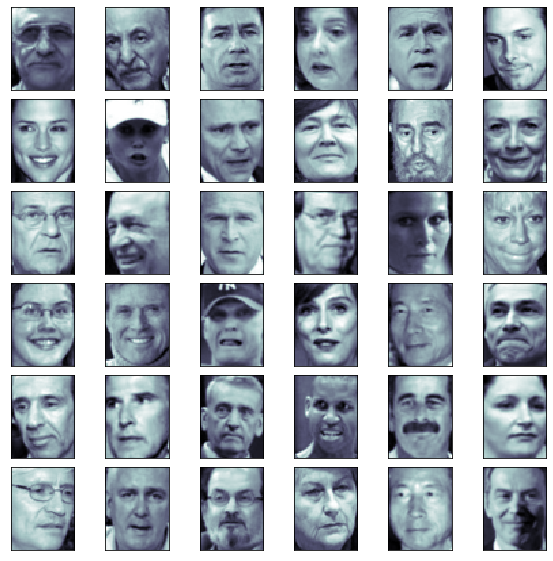

In [15]:
def plot_faces(faces): #一幅图中绘制多个子图
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), 
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47),cmap='bone')
    plt.show()
plot_faces(example_face) #绘制36张人脸图片

In [19]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

#### 特征脸

In [21]:
%%time #数据太多，计算困难，下面换小一点的数据
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized') #随机的方式求解PCA，随机会快一些
pca.fit(X)

MemoryError: Unable to allocate array with shape (13233, 2914) and data type float32

In [22]:
faces = fetch_lfw_people(min_faces_per_person=60) #人脸数据至少60张人数
faces.data.shape

(1348, 2914)

In [24]:
len(faces.target_names) #人数

8

In [33]:
X = faces.data
y = faces.target


In [34]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X)

Wall time: 684 ms


PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [35]:
pca.components_.shape

(100, 2914)

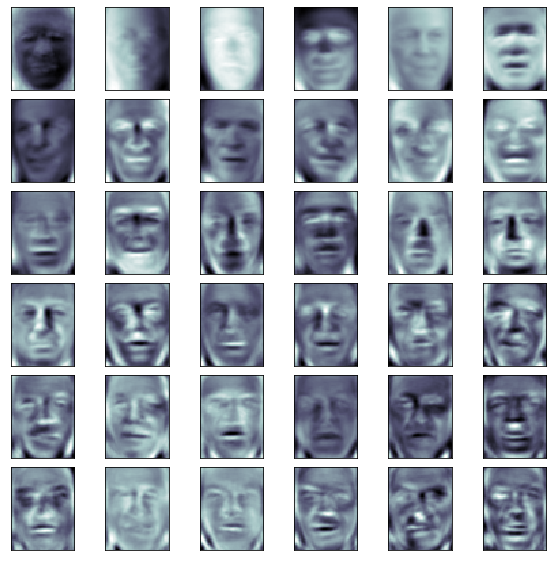

In [40]:
plot_faces(pca.components_[:36, :])